In [1]:
#import
import pandas as pd
data = pd.read_csv("abcnews-date-text.csv")

# Print the data
print(data)


         publish_date                                      headline_text
0            20030219  aba decides against community broadcasting lic...
1            20030219     act fire witnesses must be aware of defamation
2            20030219     a g calls for infrastructure protection summit
3            20030219           air nz staff in aust strike for pay rise
4            20030219      air nz strike to affect australian travellers
...               ...                                                ...
1244179      20211231  two aged care residents die as state records 2...
1244180      20211231  victoria records 5;919 new cases and seven deaths
1244181      20211231    wa delays adopting new close contact definition
1244182      20211231  western ringtail possums found badly dehydrate...
1244183      20211231  what makes you a close covid contact here are ...

[1244184 rows x 2 columns]


In [18]:
# Transform the date
data['publish_date'] = pd.to_datetime(data['publish_date'], format='%Y/%m/%d')
#data['publish_date'] = data['publish_date'].dt.strftime('%Y/%m/%d')#ajout \

In [20]:
data.head()

,publish_date,headline_text,headline_text_cleaned
0,2003-02-19,aba decides against community broadcasting lic...,aba decides community broadcasting licence
1,2003-02-19,act fire witnesses must be aware of defamation,act fire witness must aware defamation
2,2003-02-19,a g calls for infrastructure protection summit,g call infrastructure protection summit
3,2003-02-19,air nz staff in aust strike for pay rise,air nz staff aust strike pay rise
4,2003-02-19,air nz strike to affect australian travellers,air nz strike affect australian traveller


In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download the required resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Define the corpus and cleaning function
def corpus_and_cleaning(text):
    # Tokenize the text
    tokens = word_tokenize(text.lower())
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [token for token in tokens if token not in stop_words]
    
    # Lemmatize the tokens
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]
    
    # Join the tokens back into a string
    cleaned_text = ' '.join(lemmatized_tokens)
    
    return cleaned_text

# Apply the corpus and cleaning function to the 'headline_text' column
data['headline_text_cleaned'] = data['headline_text'].apply(corpus_and_cleaning)

# Print the cleaned data
print(data['headline_text_cleaned'])


# Stat frequence

In [7]:
# Define the words to remove
words_to_remove = ['u', 'new', 'man','']

# Remove the specified words
filtered_words = words[~words.isin(words_to_remove)]

# Count the occurrences of each word
word_counts = filtered_words.value_counts()

# Calculate descriptive statistics
maximum = word_counts.max()
minimum = word_counts.min()
mean = word_counts.mean()
variance = word_counts.var()
median = word_counts.median()
quantiles = word_counts.quantile([0.25, 0.5, 0.75])

# Print the results
print("Maximum:", maximum)
most_common_word = word_counts.idxmax()
print("The word with the highest number of iterations is:", most_common_word)
print("Mean:", mean)
print("Variance:", variance)
print("Median:", median)
print("Quantiles:", quantiles)



Maximum: 39857
The word with the highest number of iterations is: police
Mean: 69.10543950951735
Variance: 282681.3139223098
Median: 2.0
Quantiles: 0.25     1.0
0.50     2.0
0.75    10.0
Name: count, dtype: float64


## Wordcloud

In [20]:
# Import the wordcloud library
from wordcloud import WordCloud


# Generate the word cloud from the east of eden
wordcloud = WordCloud(width=480, height=480, margin=0).generate(data['headline_text_cleaned'].str.cat(sep='\n'))


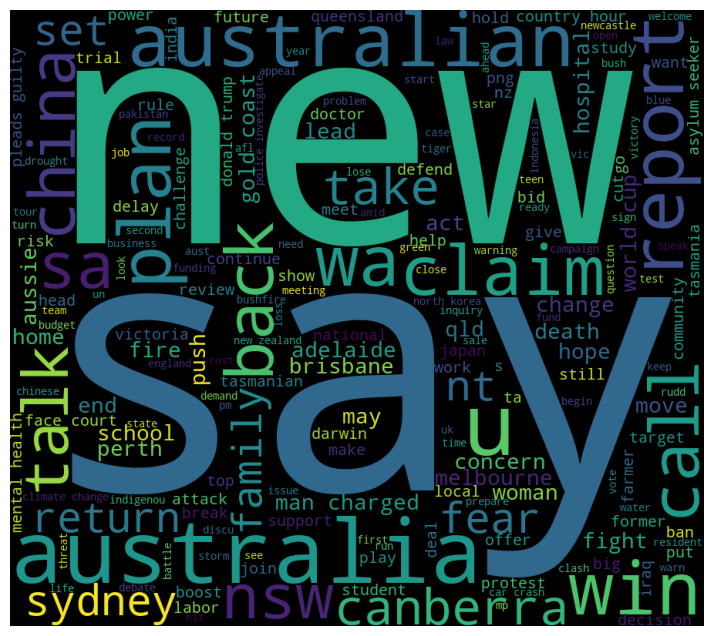

In [29]:
import matplotlib.pyplot as plt

# Display the word cloud
# Generate the word cloud with larger dimensions
wordcloud = WordCloud(width=900, height=800, margin=0).generate(data['headline_text_cleaned'].str.cat(sep='\n'))

# Display the enlarged word cloud
plt.figure(figsize=(20, 8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

wordcloud

In [24]:
iteration_new = word_counts['police']
print("Number of iterations of 'new':", iteration_new)


Number of iterations of 'new': 39857


In [42]:
top_5_words = word_counts.nlargest(30
                                )
print(top_5_words)


headline_text_cleaned
police        39857
new           33734
man           31809
say           28906
u             20627
australia     20239
call          19634
plan          19480
council       19366
court         18559
fire          18256
govt          17104
win           16733
nsw           16577
back          16297
australian    16243
interview     16199
woman         16042
death         15598
crash         14143
sydney        13755
wa            13505
year          13487
water         13458
report        13062
get           12625
qld           12602
face          12288
health        11986
day           11903
Name: count, dtype: int64


### mot geographique (qld, australia, etc)
### mot commun (year, day,man...)
### mot lié à la politique(govt, court, police, council...)

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

# Create an instance of CountVectorizer
vectorizer = CountVectorizer()

# Fit and transform the cleaned text data
dtm = vectorizer.fit_transform(data['headline_text_cleaned'])

# Convert the document-term matrix to a pandas DataFrame
dtm_df = pd.DataFrame(dtm.toarray(), columns=vectorizer.get_feature_names())

# Print the document-term matrix
print(dtm_df)


MemoryError: Unable to allocate 892. GiB for an array with shape (1244184, 96232) and data type int64

# Evolution de la présence d'un mot au fil des années

In [30]:
import matplotlib.pyplot as plt

In [39]:
def evolution_mot(mot, data):
    # Filter the data for the specified word
    word_data = data[data['headline_text_cleaned'].str.contains(mot)]
    
    # Group the data by year and count the occurrences of the word
    word_counts = word_data.groupby(data['publish_date'].dt.year)['headline_text_cleaned'].count()
    
    # Plot the evolution of the word frequency
    word_counts.plot(kind='line', figsize=(10, 6))
    plt.xlabel('Year')
    plt.ylabel('Frequency')
    plt.title(f'Evolution of the Frequency of "{mot}" over the Years')
    plt.show()
    


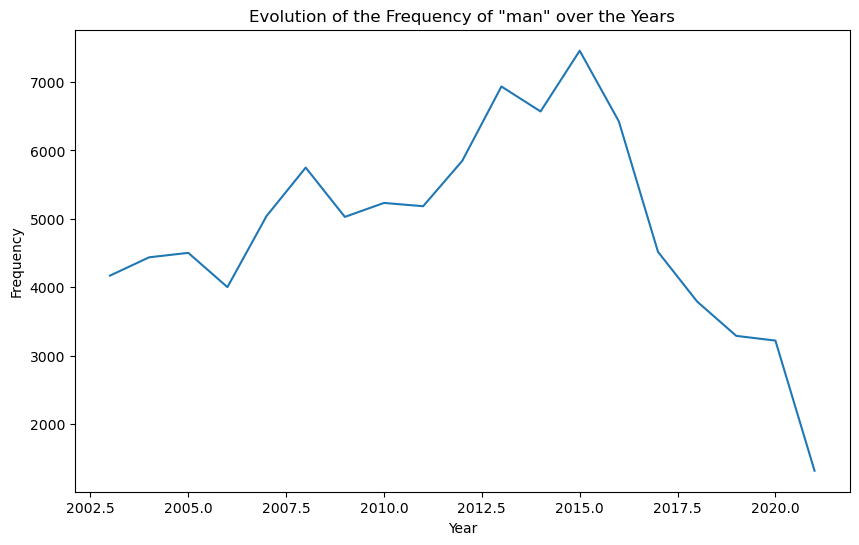

In [41]:
evolution_mot('man', data)

publish_date
2020    3277
2021    1947
Name: headline_text_cleaned, dtype: int64


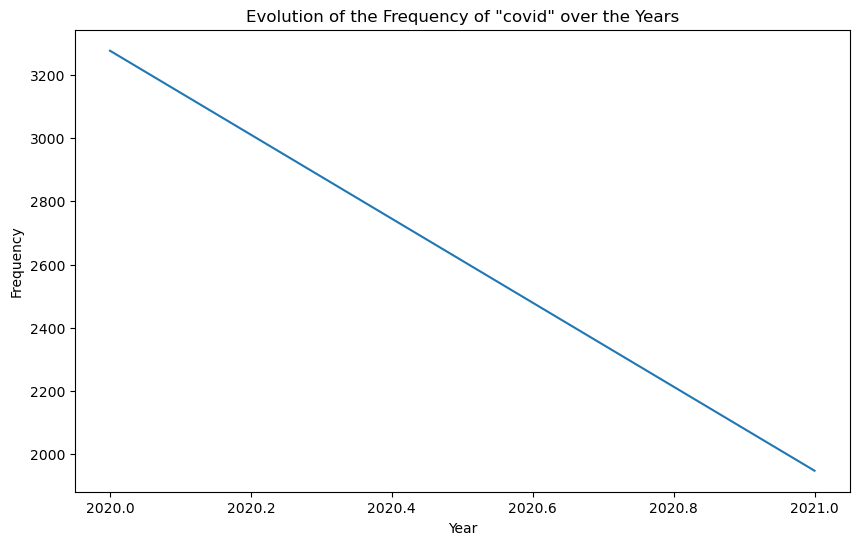

In [35]:
# Call the evolution_mot function
evolution_mot('covid', data)

publish_date
2003    2408
2004    2864
2005    3029
2006    2546
2007    3445
2008    3245
2009    2783
2010    2508
2011    2170
2012    2323
2013    2512
2014    2191
2015    2213
2016    1732
2017    1219
2018    1103
2019    1043
2020    1222
2021     471
Name: headline_text_cleaned, dtype: int64


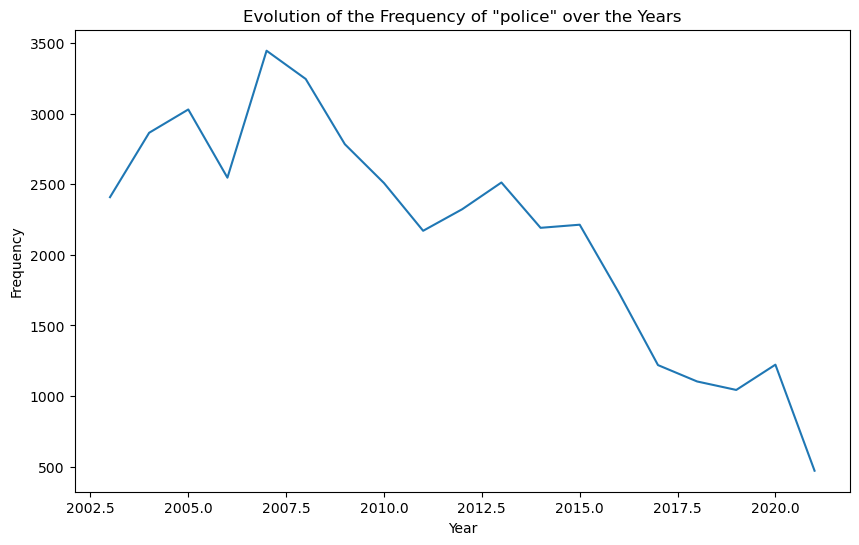

In [36]:
evolution_mot('police', data)

publish_date
2003    132
2004    421
2005    102
2006     73
2007    107
2008    554
2009     53
2010     60
2011     90
2012    399
2013    102
2014     91
2015    143
2016    461
2017     71
2018    104
2019     55
2020    118
2021     99
Name: headline_text_cleaned, dtype: int64


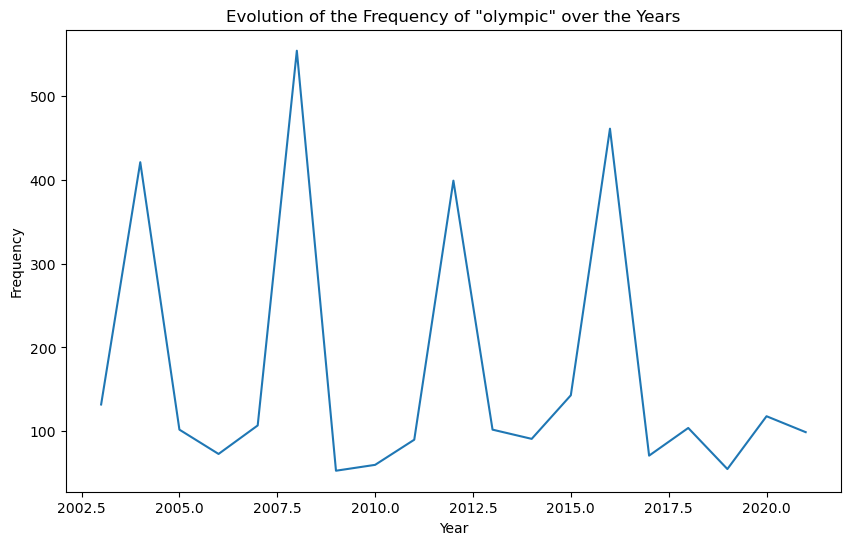

In [37]:
evolution_mot('olympic', data)

publish_date
2003    1888
2004    1792
2005    1043
2006     880
2007     932
2008     436
2009     170
2010     121
2011      85
2012      76
2013      94
2014     272
2015     160
2016     134
2017      74
2018      32
2019      32
2020      24
2021      15
Name: headline_text_cleaned, dtype: int64


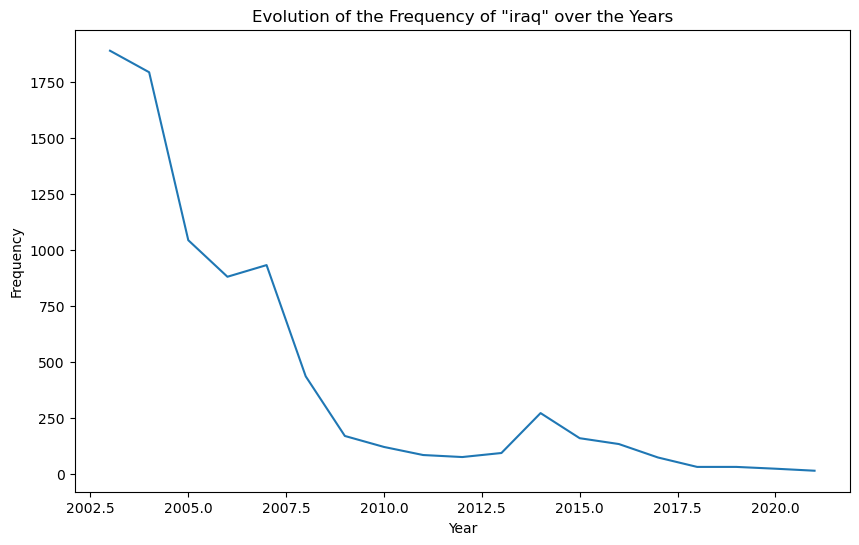

In [38]:
evolution_mot('iraq', data)

# LDA

In [1]:
#import
import pandas as pd

data=pd.read_csv("abcnews-date-text_cleaned.csv")

In [2]:
data

,publish_date,headline_text,headline_text_cleaned
0,2003/02/19,aba decides against community broadcasting lic...,aba decides community broadcasting licence
1,2003/02/19,act fire witnesses must be aware of defamation,act fire witness must aware defamation
2,2003/02/19,a g calls for infrastructure protection summit,g call infrastructure protection summit
3,2003/02/19,air nz staff in aust strike for pay rise,air nz staff aust strike pay rise
4,2003/02/19,air nz strike to affect australian travellers,air nz strike affect australian traveller
...,...,...,...
1244179,2021/12/31,two aged care residents die as state records 2...,two aged care resident die state record 2 ; 093
1244180,2021/12/31,victoria records 5;919 new cases and seven deaths,victoria record 5 ; 919 new case seven death
1244181,2021/12/31,wa delays adopting new close contact definition,wa delay adopting new close contact definition
1244182,2021/12/31,western ringtail possums found badly dehydrate...,western ringtail possum found badly dehydrated...


In [3]:
import gensim

In [30]:
headlines_2003_02_19 = pd.DataFrame(data[(data['publish_date'] >'2003/01/01') & (data['publish_date'] <'2003/12/31')]['headline_text_cleaned'])
headlines_2003_02_19


,headline_text_cleaned
0,aba decides community broadcasting licence
1,act fire witness must aware defamation
2,g call infrastructure protection summit
3,air nz staff aust strike pay rise
4,air nz strike affect australian traveller
...,...
63809,wollongong harbour algal bloom disappears
63810,worksafe probe shire president death
63811,youth transferred centre riot
63812,zimbabwe facing famine crisis un


In [31]:
from gensim.utils import simple_preprocess

texts = headlines_2003_02_19['headline_text_cleaned'].apply(simple_preprocess)

In [32]:
texts

0        [aba, decides, community, broadcasting, licence]
1           [act, fire, witness, must, aware, defamation]
2              [call, infrastructure, protection, summit]
3               [air, nz, staff, aust, strike, pay, rise]
4        [air, nz, strike, affect, australian, traveller]
                               ...                       
63809     [wollongong, harbour, algal, bloom, disappears]
63810          [worksafe, probe, shire, president, death]
63811                  [youth, transferred, centre, riot]
63812              [zimbabwe, facing, famine, crisis, un]
63813                 [zoo, play, cupid, lovelorn, tiger]
Name: headline_text_cleaned, Length: 63814, dtype: object

In [33]:
from gensim import corpora

dictionary = corpora.Dictionary(texts)
dictionary.filter_extremes(no_below=5, no_above=0.5)

corpus = [dictionary.doc2bow(text) for text in texts]

In [40]:
from gensim import models

n_topics = 4

lda_model = models.LdaModel(corpus=corpus, num_topics=n_topics)

In [26]:
lda_model.print_topics()

[(0,
  '0.018*"591" + 0.013*"73" + 0.010*"15" + 0.010*"91" + 0.009*"43" + 0.008*"318" + 0.008*"288" + 0.006*"129" + 0.006*"298" + 0.006*"536"'),
 (1,
  '0.010*"377" + 0.008*"83" + 0.007*"93" + 0.006*"754" + 0.006*"373" + 0.006*"72" + 0.005*"2701" + 0.005*"182" + 0.005*"1381" + 0.005*"839"'),
 (2,
  '0.009*"43" + 0.007*"109" + 0.007*"473" + 0.006*"288" + 0.006*"156" + 0.005*"140" + 0.005*"136" + 0.005*"93" + 0.005*"166" + 0.005*"34"')]

In [41]:
import pyLDAvis
import pyLDAvis.gensim

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.085865 -0.289817       1        1  25.605419
2     -0.099442  0.228898       2        1  25.277819
3      0.337280  0.014583       3        1  24.848932
0     -0.151972  0.046336       4        1  24.267830, topic_info=       Term         Freq        Total Category  logprob  loglift
257  police  2581.000000  2581.000000  Default  30.0000  30.0000
297     man  1608.000000  1608.000000  Default  29.0000  29.0000
177    govt  1743.000000  1743.000000  Default  28.0000  28.0000
232   court  1236.000000  1236.000000  Default  27.0000  27.0000
460    face   876.000000   876.000000  Default  26.0000  26.0000
..      ...          ...          ...      ...      ...      ...
441     say   349.343700  1186.179718   Topic4  -5.3661   0.1936
483  farmer   262.489040   426.687034   Topic4  -5.6519   0.9302
120    help   277.096223   571.327985   Topic4  -5.5978   0.6924
41     iraq   296.259903  1002.167209   Topic4  -5.5309   0.1973
406     get   275.247808   694.755994   Topic4  -5.6044   0.4901

[282 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
349       1  0.995958  aboriginal
2052      4  0.998484       abuse
990       1  0.006157    accident
990       3  0.991281    accident
5         1  0.892373         act
...     ...       ...         ...
457       4  0.395739       world
1218      1  0.202348        year
1218      2  0.511014        year
1218      3  0.270940        year
1218      4  0.017148        year

[524 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 3, 4, 1])

In [42]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
import gensim
from gensim import corpora

# Create an instance of CountVectorizer
vectorizer = CountVectorizer()
vectorizer = CountVectorizer()

# Fit and transform the cleaned text data
dtm = vectorizer.fit_transform(headlines_2003_02_19['headline_text_cleaned'])

# Define the number of topics
num_topics = 5

# Create an instance of LDA
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)

# Fit the LDA model to the document-term matrix
lda.fit(dtm)

# Get the topic-word matrix
topic_word_matrix = lda.components_

# Get the feature names from the CountVectorizer
feature_names = vectorizer.get_feature_names()

# Print the top words for each topic
for topic_idx, topic in enumerate(topic_word_matrix):
    top_words = [feature_names[i] for i in topic.argsort()[:-6:-1]]
    print(f"Topic {topic_idx+1}: {' '.join(top_words)}")
    # Create a list of tokenized documents
    tokenized_docs = [doc.split() for doc in data['headline_text_cleaned']]

    # Create a dictionary from the tokenized documents
    dictionary = corpora.Dictionary(tokenized_docs)

    # Create a document-term matrix
    doc_term_matrix = [dictionary.doc2bow(doc) for doc in tokenized_docs]

    # Define the number of topics
    num_topics = 5

    # Create an instance of LDA
    lda_model = gensim.models.LdaModel(doc_term_matrix, num_topics=num_topics, id2word=dictionary, passes=10, random_state=42)

    # Print the top words for each topic
    for idx, topic in lda_model.print_topics():
        print(f"Topic {idx+1}: {topic}")


AttributeError: 'CountVectorizer' object has no attribute 'get_feature_names'

: 